# Fashion MNIST Mini project

In [12]:
import torch
from torch import nn # nn mean nueral network
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor , Lambda, Compose
import matplotlib.pyplot as plt

In [13]:
# Download training dataset from open datasets
training_data= datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# Download testing dataset
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [14]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [15]:
batch_size=64

#Create dataloader
train_dataloader=DataLoader(training_data,batch_size=batch_size)
test_dataloader= DataLoader(test_data,batch_size=batch_size)

for X ,y in test_dataloader:
  print("Shape of X in [N,C,H,W] :",X.shape)
  print("Shape of y : ",y.shape)
  break

Shape of X in [N,C,H,W] : torch.Size([64, 1, 28, 28])
Shape of y :  torch.Size([64])


In [16]:
# check devide cpu or gpu available or not
cuda = "cuda" if torch.cuda.is_available() else "cpu"
print(cuda)

cuda


In [17]:
#Define the NN
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()

    #hidden layer of relu activation function
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10) #Output layer
    )
  def forward(self,x):
    x=self.flatten(x)
    logist= self.linear_relu_stack(x) #probebility function
    return logist

model = NeuralNetwork().to(cuda)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [18]:
#Cross Entropy Loss --> because here we have multiclass classification
loss_fn= nn.CrossEntropyLoss()

#Optimizer --> SGD
#Lr = lossfunction
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)


In [28]:
#model Training
def train(dataloader,model,loss_fn,optimizer):
  size=len(dataloader.dataset)
  model.train()

  for batch, (X,y) in enumerate(dataloader):
    X, y=X.to(cuda), y.to(cuda)

    #Compute Prediction Error
    pred=model(X)
    loss = loss_fn(pred,y)

    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100==0:
      loss_val, current_samples= loss.item(), batch*len(X)
      print(f"Batch: {batch}/{len(dataloader)}, Loss: {loss_val:.4f}, Processed: {current_samples}/{size} samples")

In [26]:
def test(dataloader,model,loss_fn):
  size= len(dataloader.dataset)
  num_batches=len(dataloader)
  model.eval()

  test_loss,correct=0,0
  with torch.no_grad():
    for X,y in dataloader:
      X,y= X.to(cuda), y.to(cuda)
      pred=model(X)

      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()
  test_loss /=num_batches #average loss per batch
  correct/=size
  print(f"Test Error : \n Accuracy : {100*correct}% , Avg loss {test_loss} \n")

In [30]:
epochs=10 # Total is 20 because we trained 5 and 5 before
for t in range(epochs):
  print(f"Epoch {t}")
  train(train_dataloader,model,loss_fn,optimizer)
  test(test_dataloader,model, loss_fn)
print("Completed")

Epoch 0
Batch: 0/938, Loss: 0.6116, Processed: 0/60000 samples
Batch: 100/938, Loss: 0.7123, Processed: 6400/60000 samples
Batch: 200/938, Loss: 0.4937, Processed: 12800/60000 samples
Batch: 300/938, Loss: 0.7266, Processed: 19200/60000 samples
Batch: 400/938, Loss: 0.6519, Processed: 25600/60000 samples
Batch: 500/938, Loss: 0.6347, Processed: 32000/60000 samples
Batch: 600/938, Loss: 0.6907, Processed: 38400/60000 samples
Batch: 700/938, Loss: 0.7044, Processed: 44800/60000 samples
Batch: 800/938, Loss: 0.7013, Processed: 51200/60000 samples
Batch: 900/938, Loss: 0.6571, Processed: 57600/60000 samples
Test Error : 
 Accuracy : 77.45% , Avg loss 0.6526589112676633 

Epoch 1
Batch: 0/938, Loss: 0.5936, Processed: 0/60000 samples
Batch: 100/938, Loss: 0.6956, Processed: 6400/60000 samples
Batch: 200/938, Loss: 0.4799, Processed: 12800/60000 samples
Batch: 300/938, Loss: 0.7147, Processed: 19200/60000 samples
Batch: 400/938, Loss: 0.6423, Processed: 25600/60000 samples
Batch: 500/938, Lo

In [31]:
#save model
torch.save(model.state_dict(),"model.pth")
print("Saved model state at model.pth")

Saved model state at model.pth


In [33]:
# Predictions
classes=[
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
model.eval()
x,y=test_data[0][0],test_data[0][1]
x=x.to(cuda)
with torch.no_grad():
  pred=model(x)
  predicted,actual= classes[pred[0].argmax(0)],classes[y]
  print(f"pridicted : {predicted}, Actual : {actual}")


pridicted : Ankle boot, Actual : Ankle boot


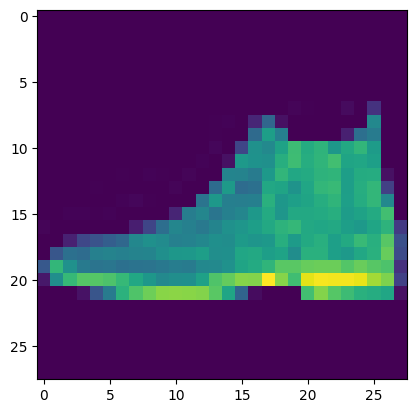

In [34]:
import matplotlib.pyplot as plt
plt.imshow(x.cpu().squeeze())# squeze for reduce the dimesion
plt.show()

In [35]:
x,y=test_data[3][0],test_data[3][1]
x=x.to(cuda)
with torch.no_grad():
  pred=model(x)
  predicted,actual= classes[pred[0].argmax(0)],classes[y]
  print(f"pridicted : {predicted}, Actual : {actual}")

pridicted : Trouser, Actual : Trouser


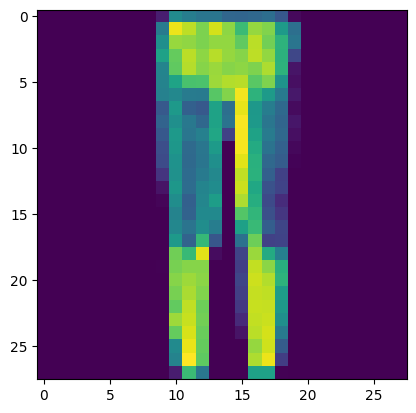

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x.cpu().squeeze())# squeze for reduce the dimesion
plt.show()

In [37]:
x,y=test_data[10][0],test_data[10][1]
x=x.to(cuda)
with torch.no_grad():
  pred=model(x)
  predicted,actual= classes[pred[0].argmax(0)],classes[y]
  print(f"pridicted : {predicted}, Actual : {actual}")

pridicted : Coat, Actual : Coat


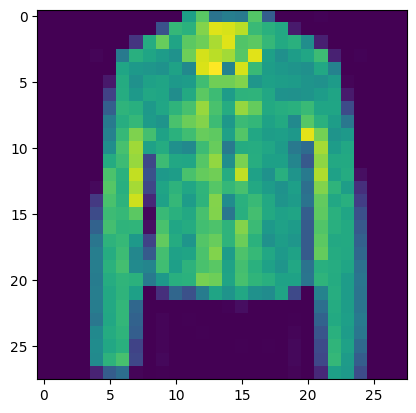

In [38]:
import matplotlib.pyplot as plt
plt.imshow(x.cpu().squeeze())# squeze for reduce the dimesion
plt.show()